## Data
- PosterLink: Link of the poster that imdb using
- SeriesTitle: Name of the movie
- ReleasedYear: Year at which that movie released
- Certificate: Certificate earned by that movie
- Runtime: Total runtime of the movie
- Genre: Genre of the movie
- IMDB Rating: Rating of the movie at IMDB site
- Overview: mini story/ summary
- Meta_score: Score earned by the movie
- Director: Name of the Director
- Star1,Star2,Star3,Star4: Name of the Stars
- No of votes: Total number of votes
- Gross: Money earned by that movie

### IMDB Dataset of top 1000 movies and tv shows.

## Importing all required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

data = pd.read_csv('/content/imdb_top_1000[1].csv')

## Shape of the data

In [7]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


## Quick view of data

In [8]:
data.head(4)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


## Number of null values

In [9]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [10]:
data = data.rename(columns={"Series_Title": "Movies_Title"})

In [11]:
data.head(2)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [12]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))

data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [13]:
data['Gross'] = data['Gross'].astype(int)

In [14]:
data['Gross'].dtype

dtype('int64')

## Finding correlation

In [15]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


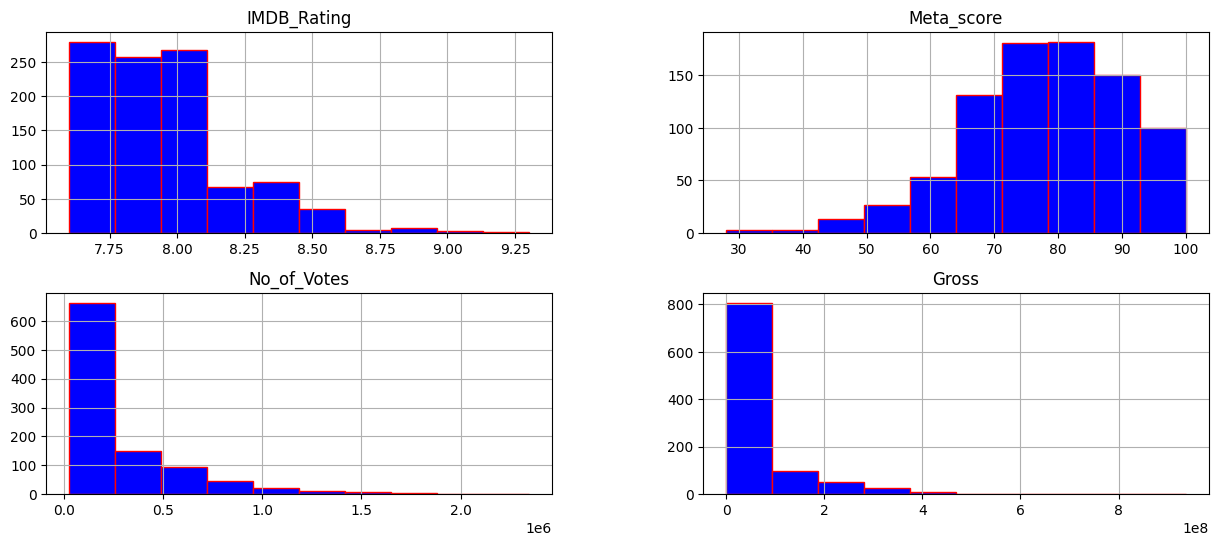

In [16]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [41]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,duration
count,1000.000000,843.000000,1.000000e+03,1.000000e+03,1000.000000
mean,7.949300,77.971530,2.736929e+05,5.653688e+07,123.891000
std,0.275491,12.376099,3.273727e+05,1.032382e+08,28.093671
min,7.600000,28.000000,2.508800e+04,0.000000e+00,46.000000
25%,7.700000,70.000000,5.552625e+04,4.457098e+05,104.000000
50%,7.900000,79.000000,1.385485e+05,1.070275e+07,120.000000
75%,8.100000,87.000000,3.741612e+05,6.153989e+07,138.000000
max,9.300000,100.000000,2.343110e+06,9.366622e+08,322.000000


In [42]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

### Top voted movies

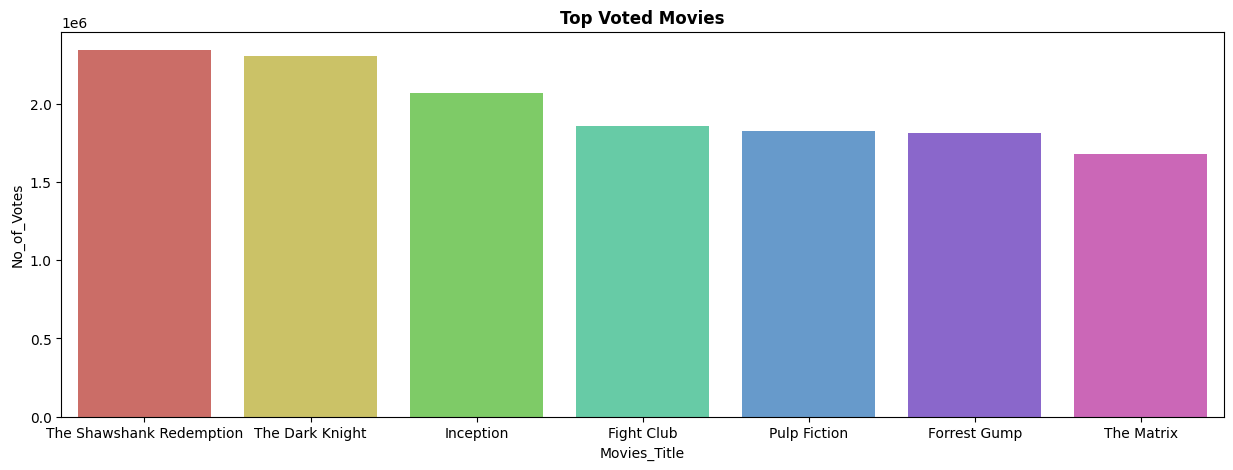

In [44]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

### Top voted movies ratings

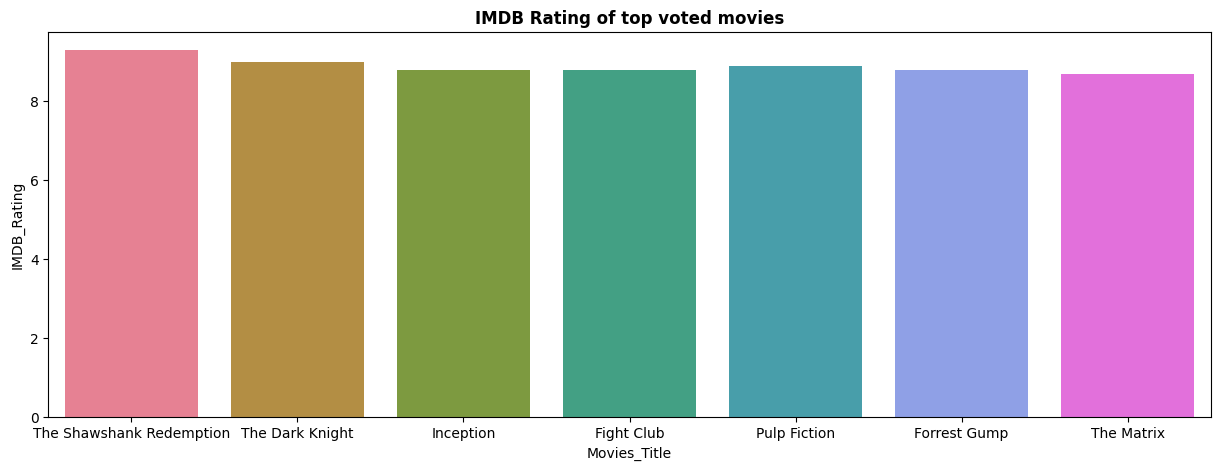

In [20]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

### Top voted movies metascores

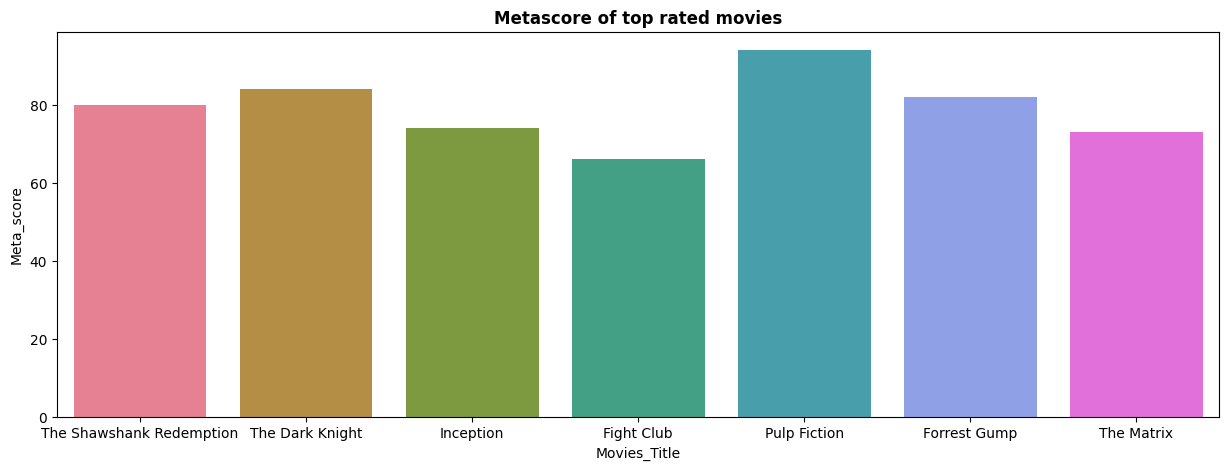

In [21]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [22]:
data['Gross'].head(5)

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int64

In [23]:
data.loc[data['Gross']==0]

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,0
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,0
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,0
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


### Gross of top rated movies

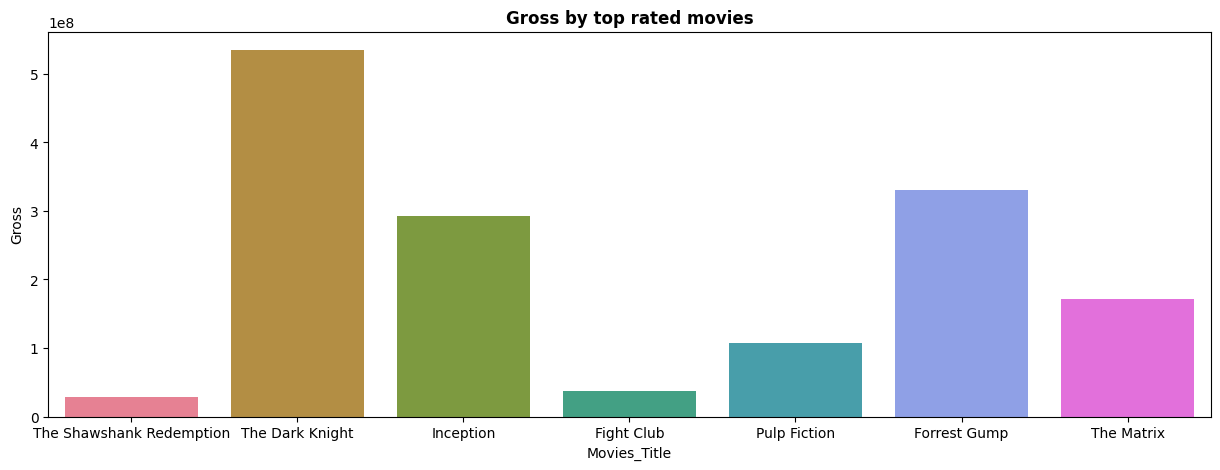

In [24]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

### Top movies by Gross

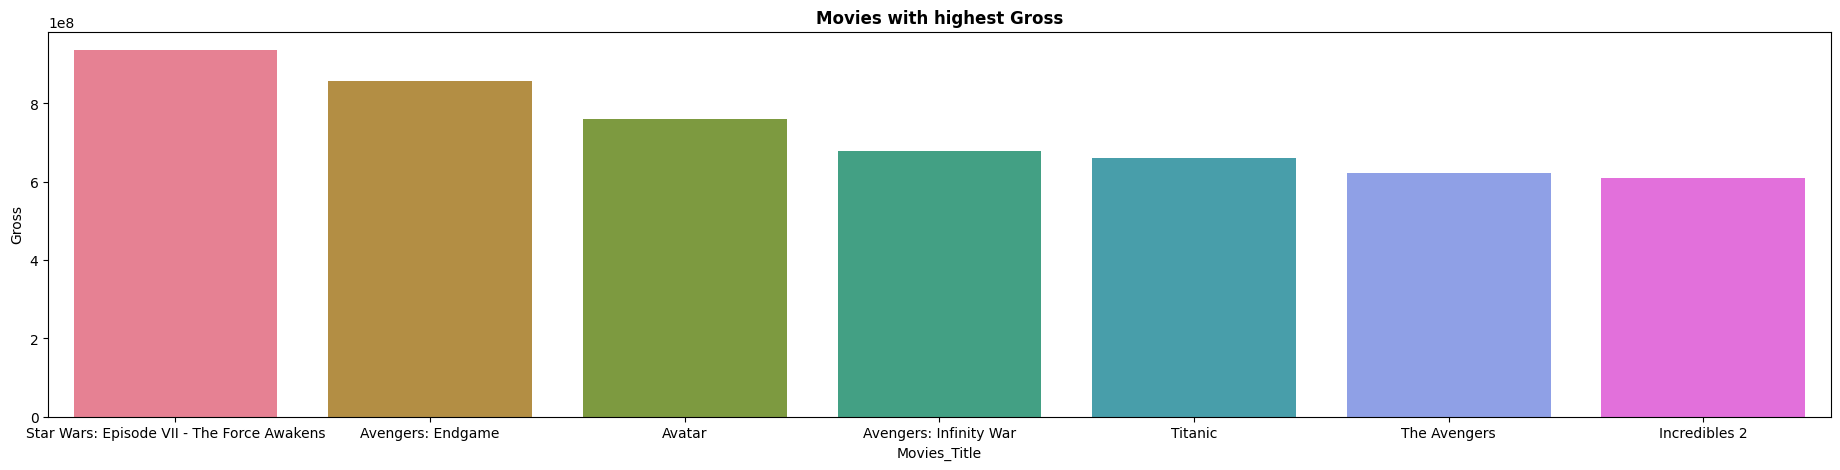

In [25]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

### Maximum movies released in-

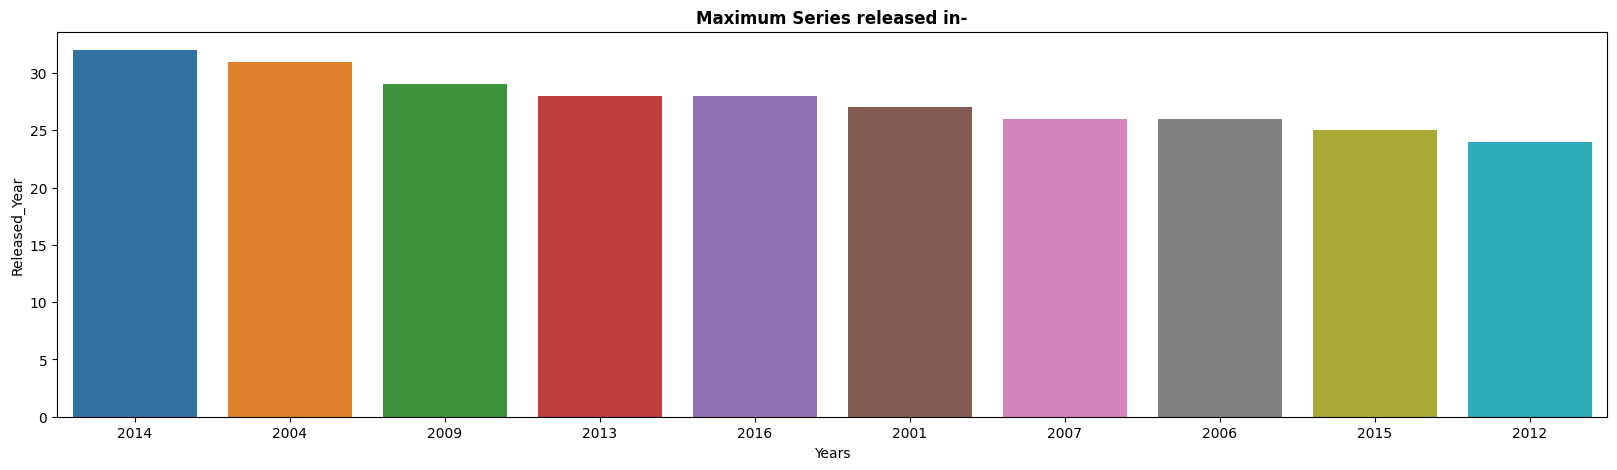

In [26]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Released_Year'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

### Mostly occurred Directors(lineplot)

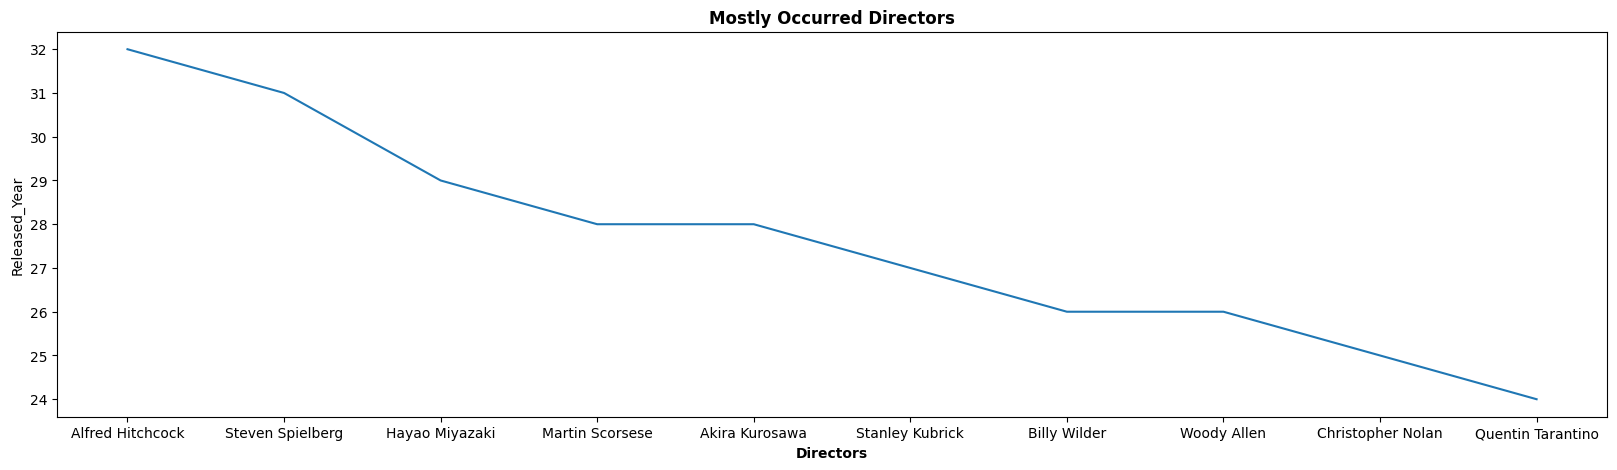

In [27]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=data['Director'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Mostly occurred directors(barplot)

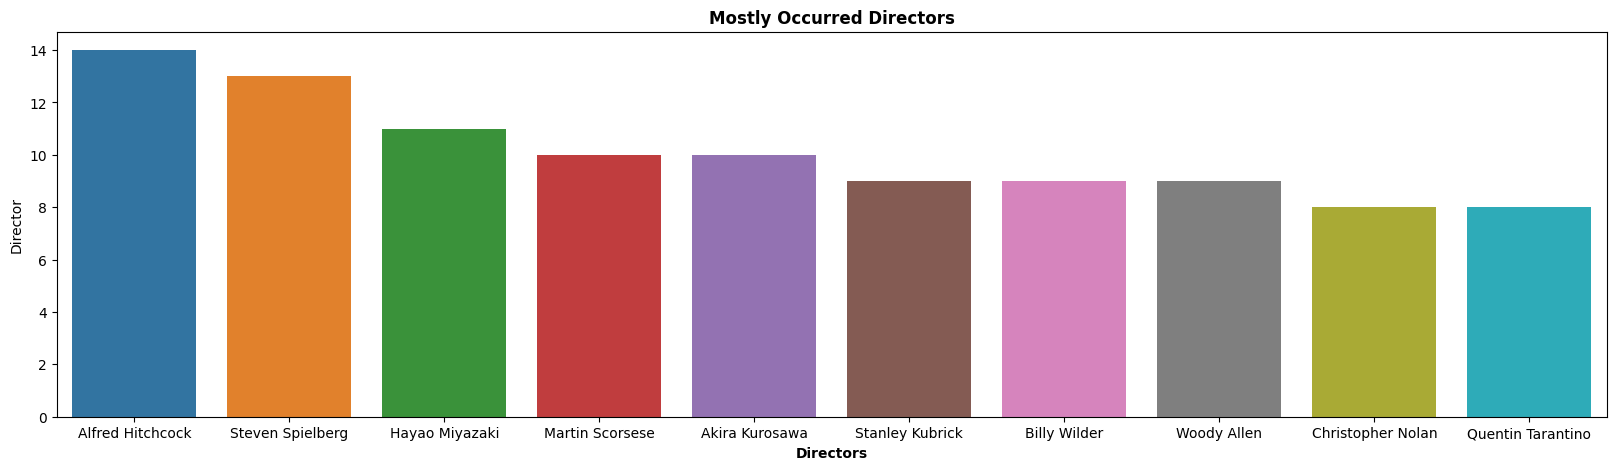

In [28]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Directors with respect to Gross of the movies

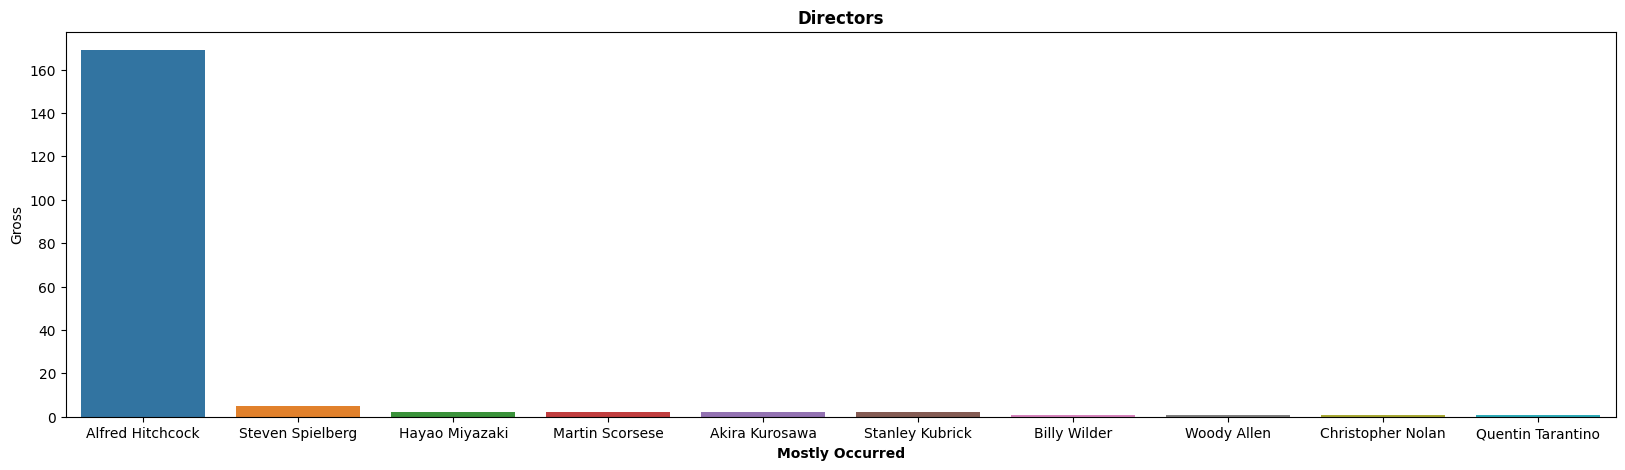

In [29]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

### Stars with most Occurences in movies

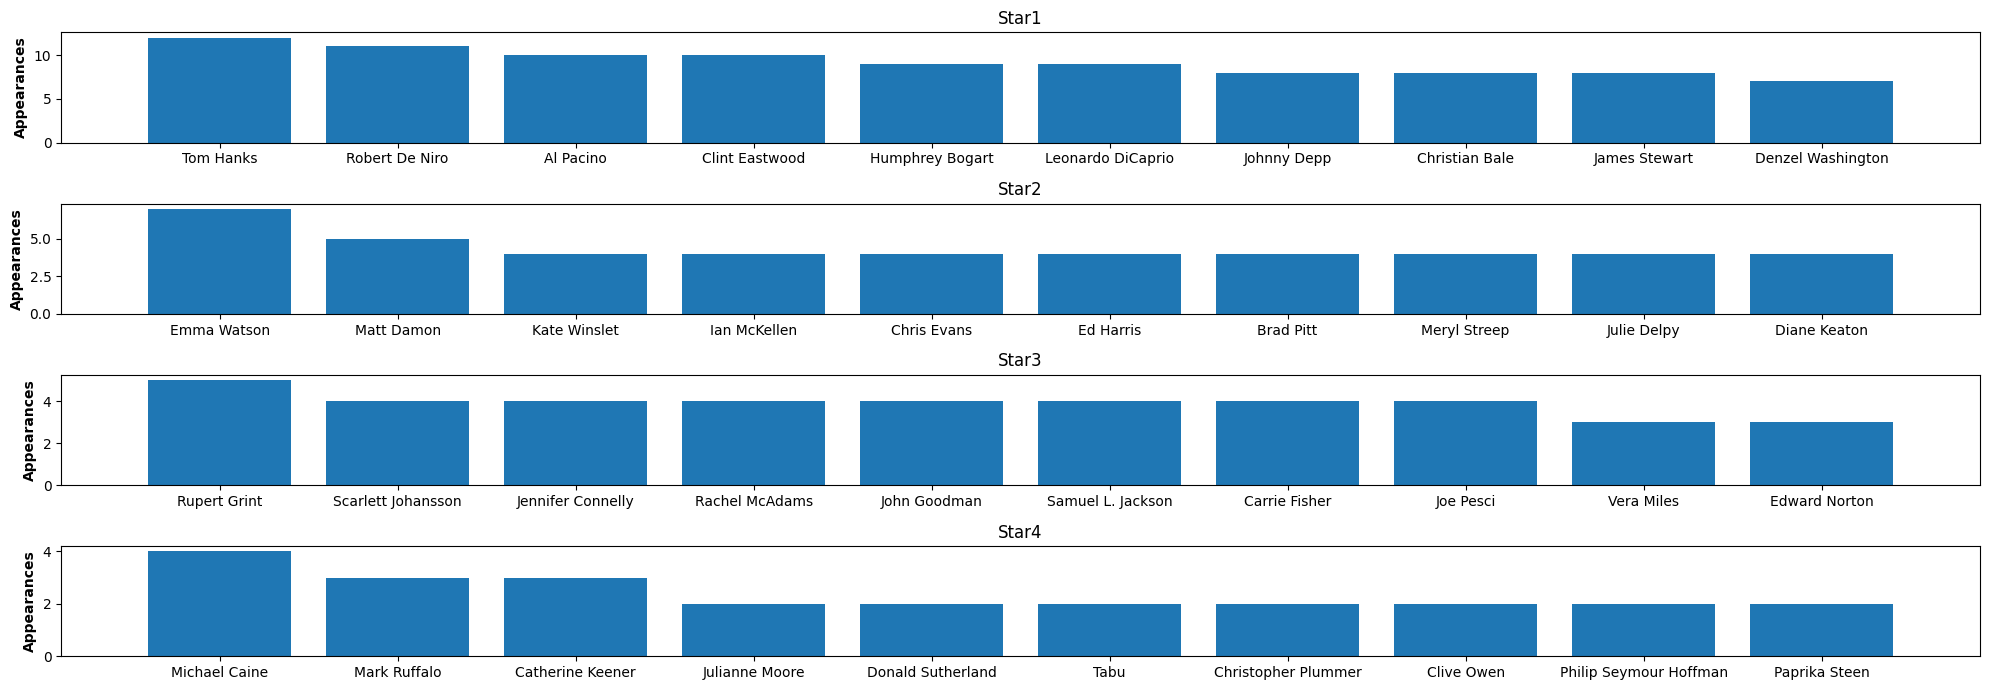

In [33]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### Appearances of Stars in Top voted movies

<ipython-input-34-980761a929f6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-34-980761a929f6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-34-980761a929f6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-34-980761a929f6>:5: FutureWarning: The default

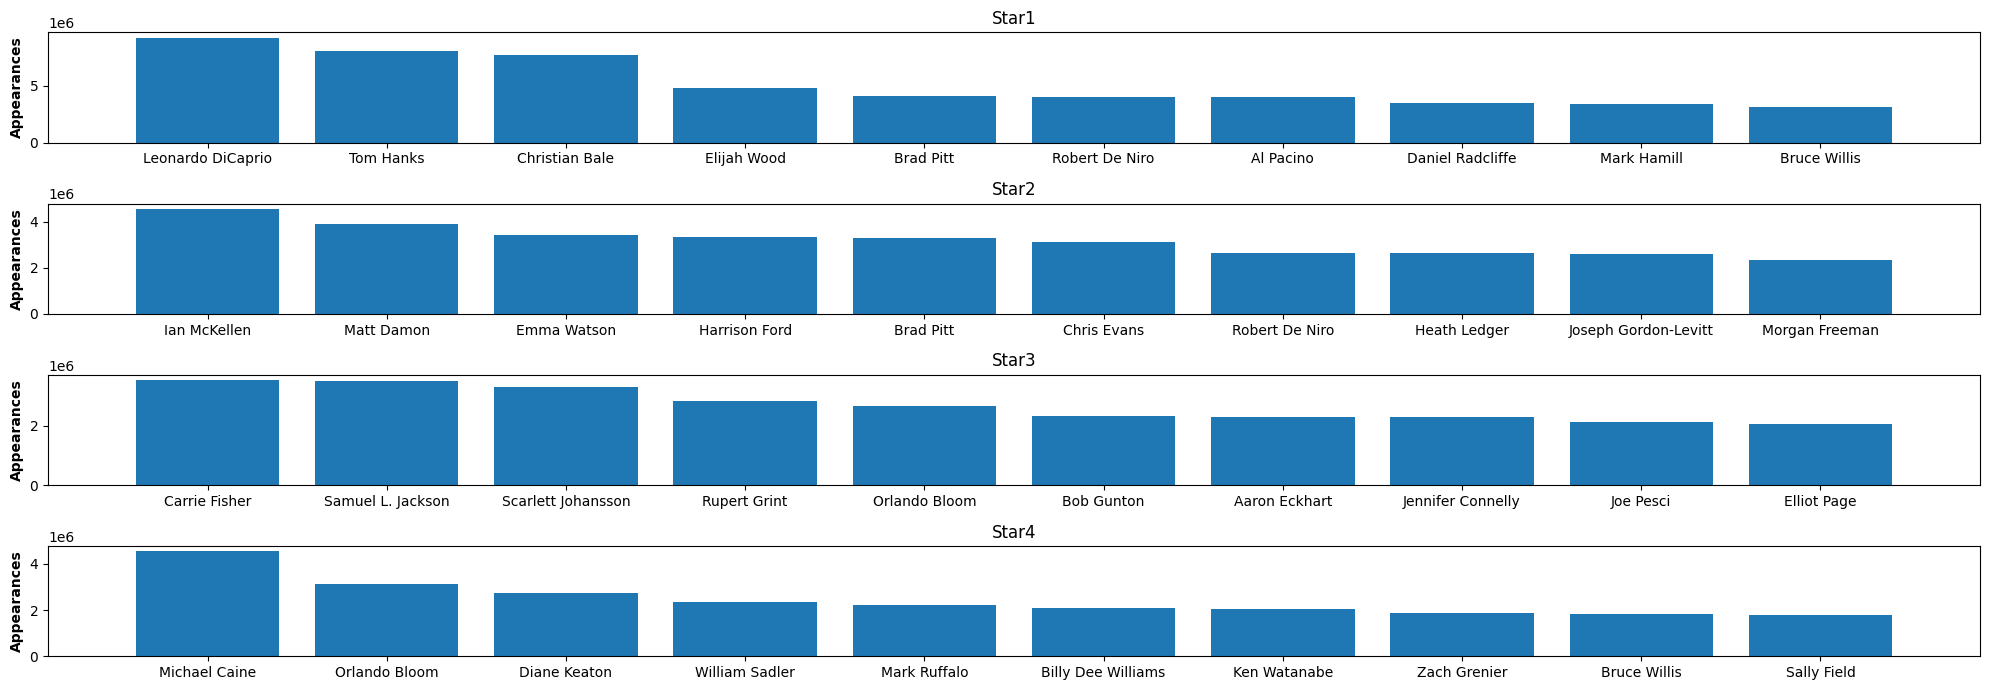

In [34]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### Appearances of Stars in top grossed movies

<ipython-input-35-d3d97303c518>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-35-d3d97303c518>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-35-d3d97303c518>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-35-d3d97303c518>:5: FutureWarning: The default

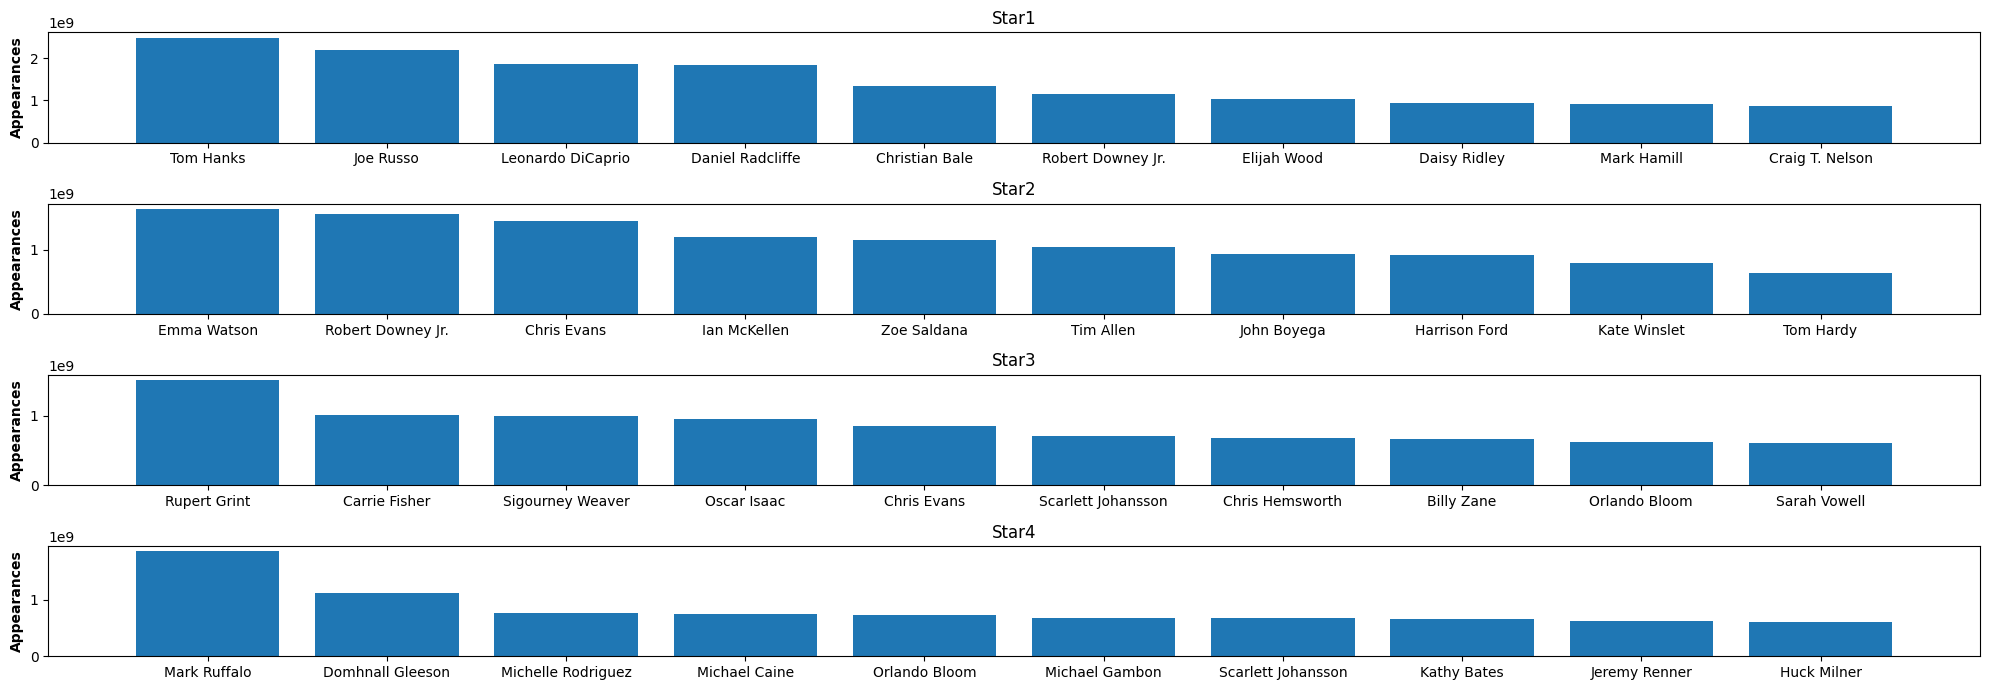

In [35]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['Gross'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Gross'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### Appearances of Stars in top rated movies

<ipython-input-36-7bb7f2b06ec6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-36-7bb7f2b06ec6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-36-7bb7f2b06ec6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-36-7bb7f2b06ec6>:5: FutureWarning: The default

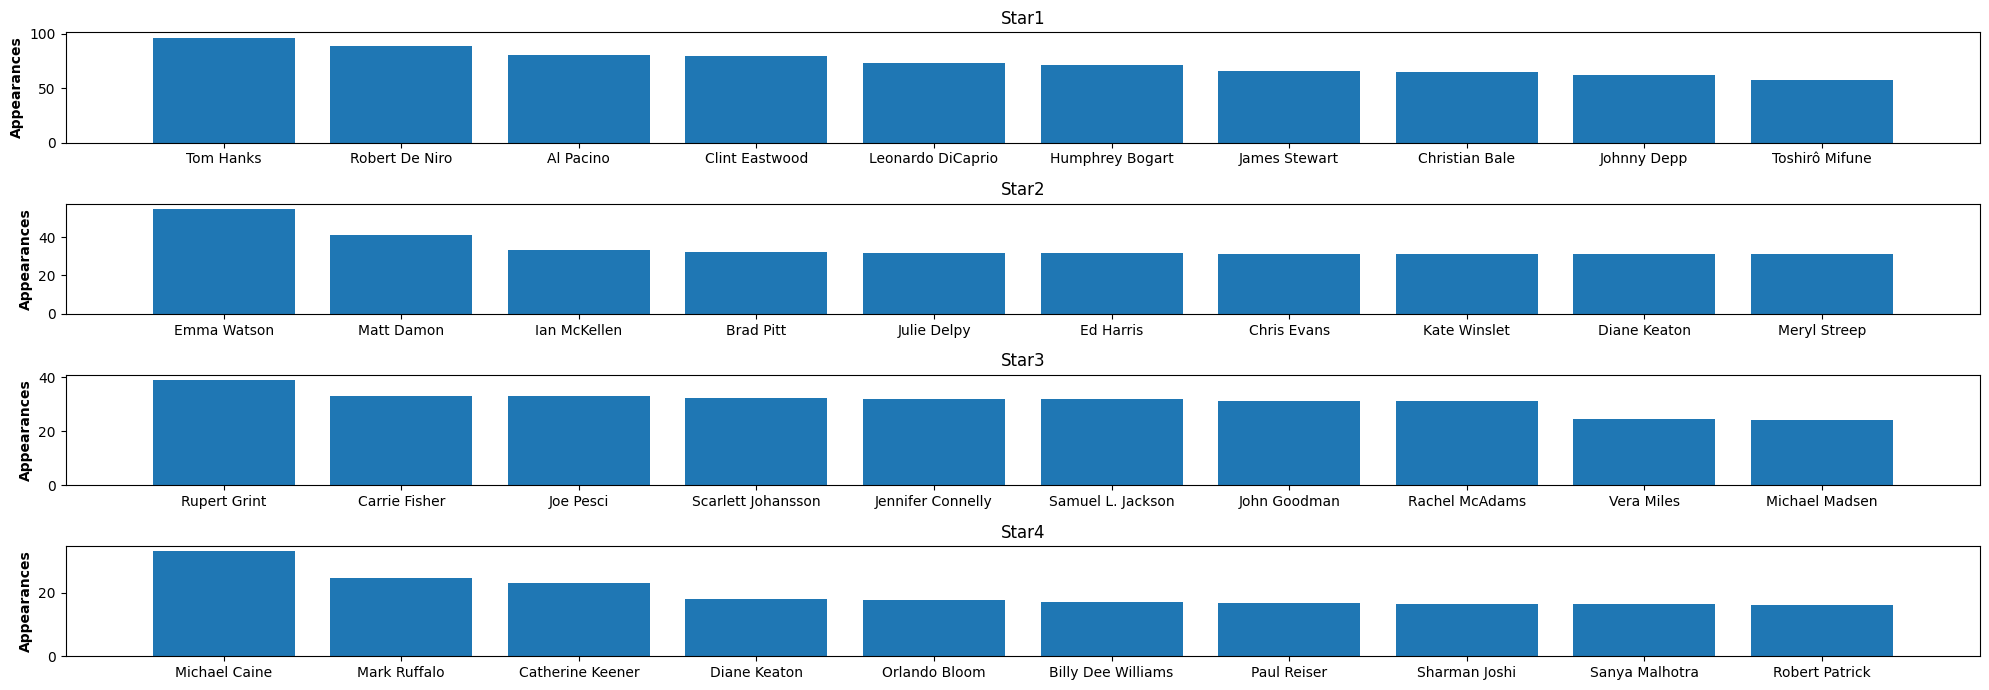

In [36]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['IMDB_Rating'],ascending=False)[:10]
    axs[ax].bar(d[x],d['IMDB_Rating'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### Appearances of Stars in top meta_scores

<ipython-input-37-019e3a2f1027>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-37-019e3a2f1027>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-37-019e3a2f1027>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-37-019e3a2f1027>:5: FutureWarning: The default

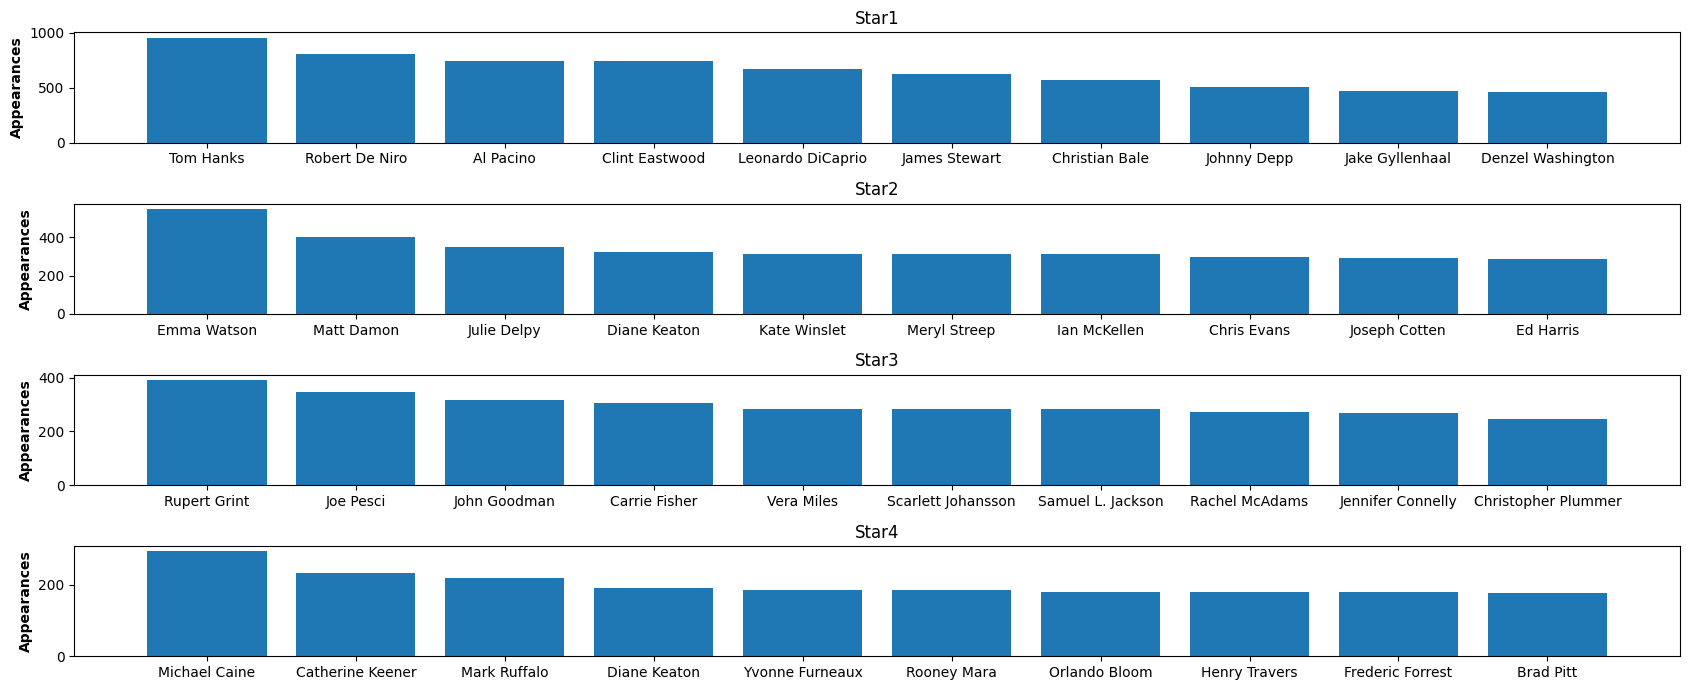

In [37]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(17,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['Meta_score'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Meta_score'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

### Checking null values in Certificate columns

In [38]:
data['Certificate'].isnull().sum()

101

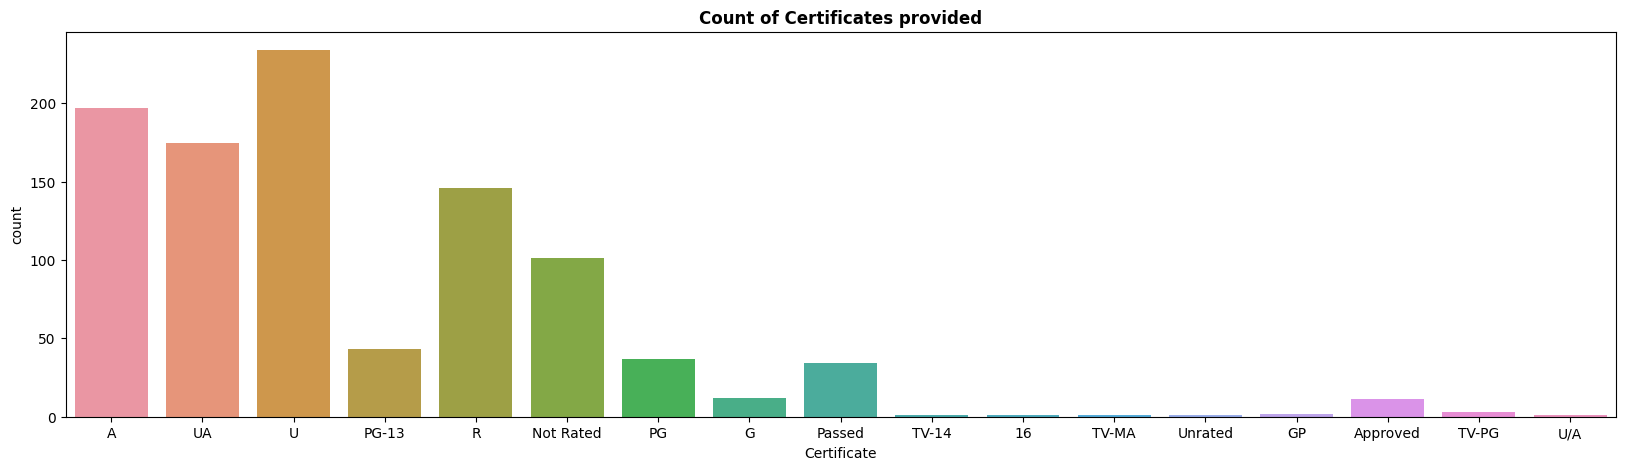

In [61]:

# Fill missing values with 'Not Rated'
data['Certificate'] = data['Certificate'].fillna('Not Rated')

# Create the count plot including 'Not Rated'
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.countplot(data=data, x='Certificate')
g.set_title("Count of Certificates provided", weight="bold")
plt.show()


### IMDB Rating Distribution

<ipython-input-57-4f0082f49e53>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data['IMDB_Rating'],bins=30)


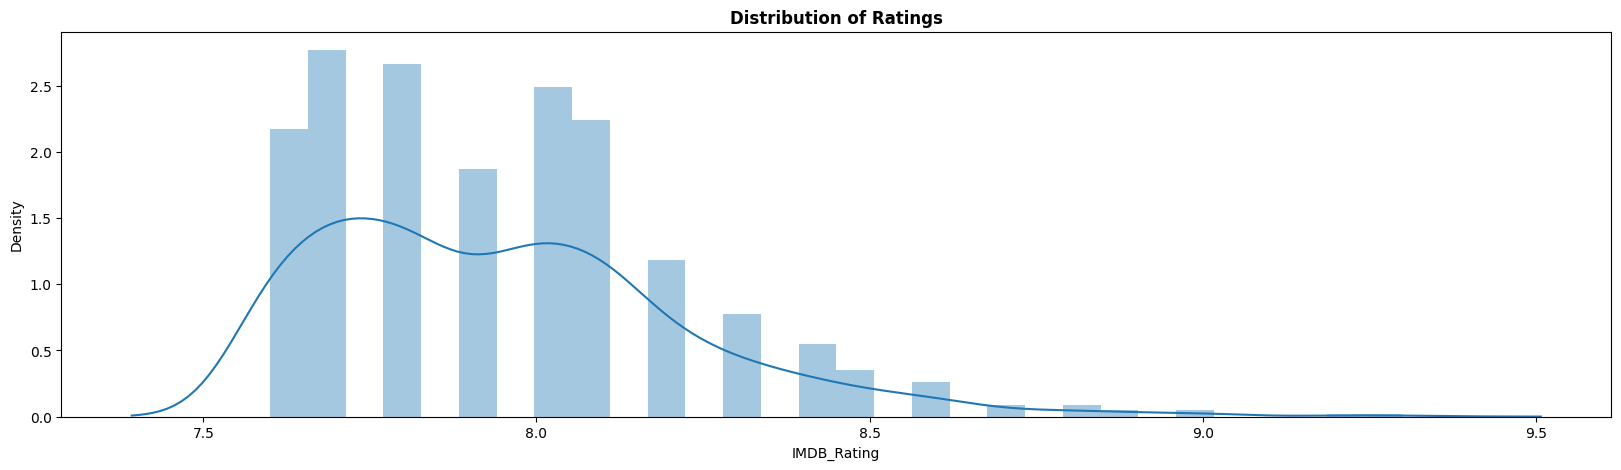

In [57]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()